In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

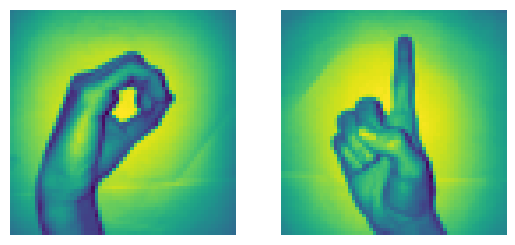

In [2]:
x_1 = np.load("/content/X.npy")
Y_1 = np.load("/content/Y.npy")
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_1[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_1[900].reshape(img_size, img_size))
plt.axis('off')

In [3]:
X = np.concatenate((x_1[204:409], x_1[822:1027] ), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [5]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [6]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [7]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [8]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [9]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [10]:
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [11]:
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}

    return parameters

In [12]:
def predict_NN(parameters,x_test):
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.370313
Cost after iteration 100: 0.347384
Cost after iteration 200: 0.321169
Cost after iteration 300: 0.302674
Cost after iteration 400: 0.265696
Cost after iteration 500: 0.225241
Cost after iteration 600: 0.189724
Cost after iteration 700: 0.150076
Cost after iteration 800: 0.141080
Cost after iteration 900: 0.123291
Cost after iteration 1000: 0.109194
Cost after iteration 1100: 0.097722
Cost after iteration 1200: 0.088155
Cost after iteration 1300: 0.080049
Cost after iteration 1400: 0.073095
Cost after iteration 1500: 0.066995
Cost after iteration 1600: 0.061372
Cost after iteration 1700: 0.055724
Cost after iteration 1800: 0.049804
Cost after iteration 1900: 0.044628
Cost after iteration 2000: 0.040808
Cost after iteration 2100: 0.037833
Cost after iteration 2200: 0.035342
Cost after iteration 2300: 0.033183
Cost after iteration 2400: 0.031279


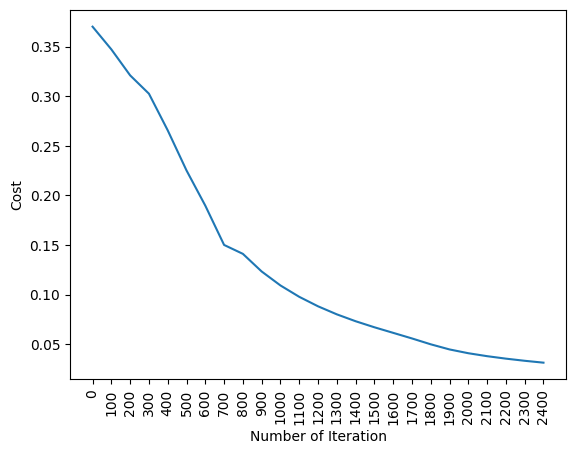

train accuracy: 100.0 %
test accuracy: 96.7741935483871 %


In [13]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        A2, cache = forward_propagation_NN(x_train,parameters)
        cost = compute_cost_NN(A2, y_train, parameters)
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        parameters = update_parameters_NN(parameters, grads)

        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

Cost after iteration 0: 0.466350
Cost after iteration 100: 0.386885
Cost after iteration 200: 0.359870
Cost after iteration 300: 0.350273
Cost after iteration 400: 0.346792
Cost after iteration 500: 0.345517
Cost after iteration 600: 0.345046
Cost after iteration 700: 0.344869
Cost after iteration 800: 0.344800
Cost after iteration 900: 0.344769
Cost after iteration 1000: 0.344751
Cost after iteration 1100: 0.344737
Cost after iteration 1200: 0.344722
Cost after iteration 1300: 0.344706
Cost after iteration 1400: 0.344699
Cost after iteration 1500: 0.344793
Cost after iteration 1600: 0.345926
Cost after iteration 1700: 0.346853
Cost after iteration 1800: 0.340059
Cost after iteration 1900: 0.308172
Cost after iteration 2000: 0.261397
Cost after iteration 2100: 0.217826
Cost after iteration 2200: 0.258031
Cost after iteration 2300: 0.189548
Cost after iteration 2400: 0.136728


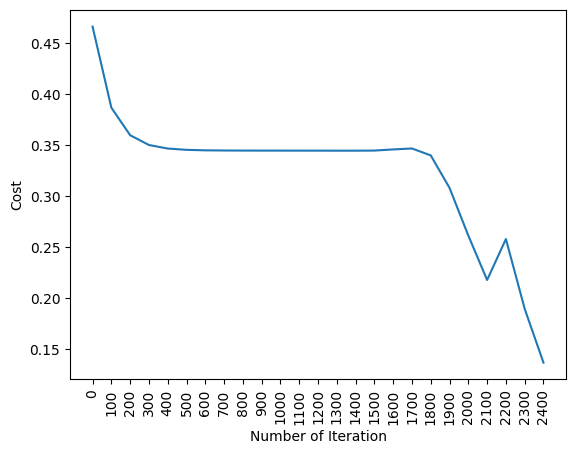

train accuracy: 97.41379310344827 %
test accuracy: 93.54838709677419 %


In [14]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        A2, cache = forward_propagation_NN(x_train,parameters)
        cost = compute_cost_NN(A2, y_train, parameters)
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        parameters = update_parameters_NN(parameters, grads)

        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)